In [2]:
import numpy as np 
import pandas as pd 
import os
import joblib

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format


In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df.duplicated().sum()

3854

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

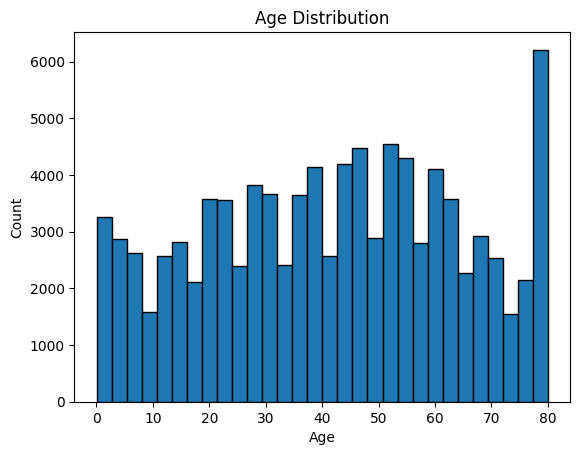

In [12]:
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

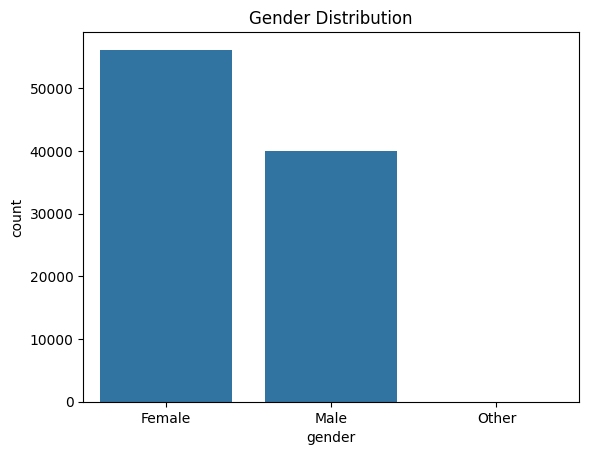

In [13]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

In [14]:
count_survival_classes = df['gender'].value_counts()
print("Counts for each class in 'survived':")
print(count_survival_classes)

Counts for each class in 'survived':
gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64


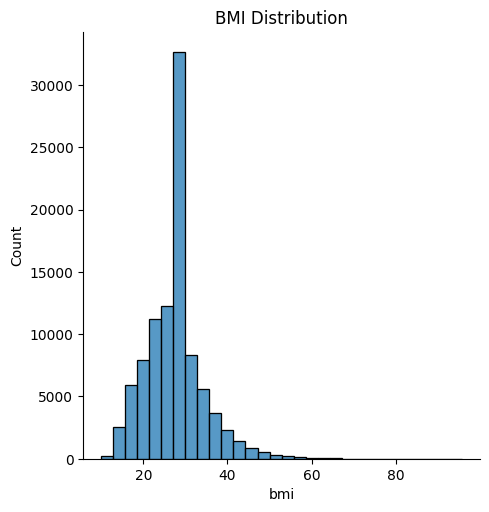

In [15]:
sns.displot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

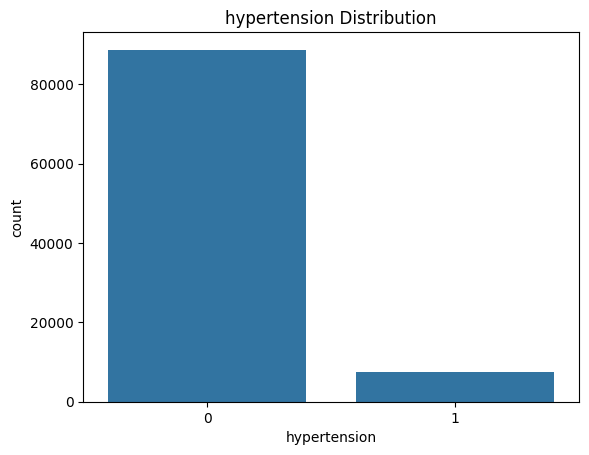

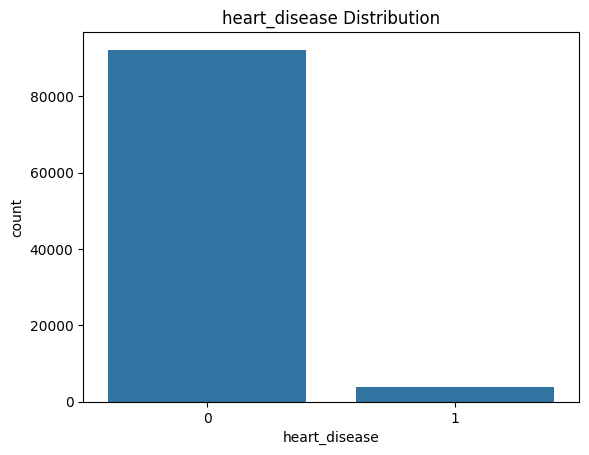

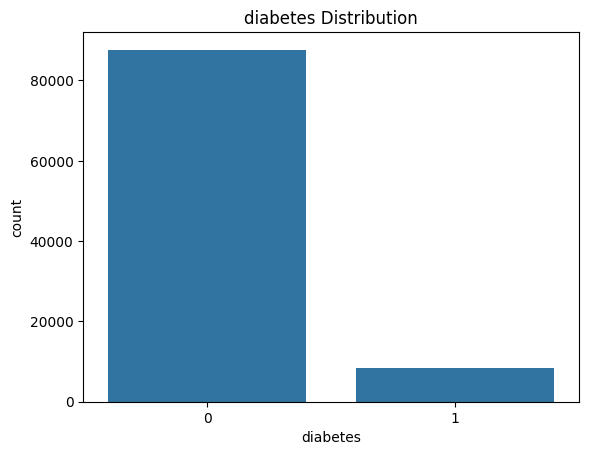

In [16]:
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

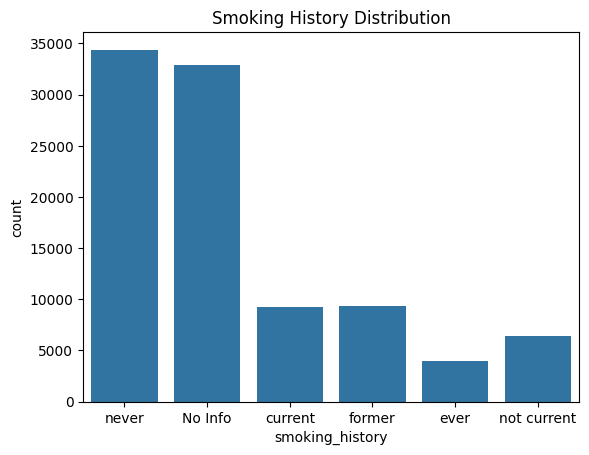

In [17]:
# Count plot for smoking history
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

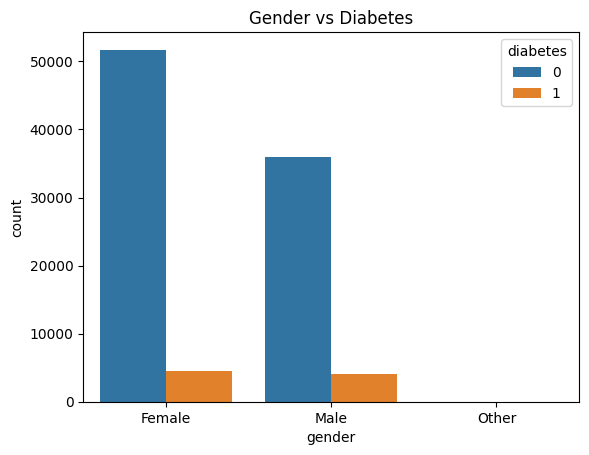

In [18]:
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

In [19]:
df1= df.copy()

In [20]:
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
df1['smoking_history'] = df1['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df1['smoking_history'].value_counts())

smoking_history
non-smoker     67285
past_smoker    19664
current         9197
Name: count, dtype: int64


In [21]:
print(df1['diabetes'].value_counts())

diabetes
0    87664
1     8482
Name: count, dtype: int64


In [22]:
df1.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,non-smoker,25.19,6.60,140,0
1,Female,54.00,0,0,non-smoker,27.32,6.60,80,0
2,Male,28.00,0,0,non-smoker,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0
5,Female,20.00,0,0,non-smoker,27.32,6.60,85,0
6,Female,44.00,0,0,non-smoker,19.31,6.50,200,1
7,Female,79.00,0,0,non-smoker,23.86,5.70,85,0
8,Male,42.00,0,0,non-smoker,33.64,4.80,145,0
9,Female,32.00,0,0,non-smoker,27.32,5.00,100,0


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df1['gender'] = le.fit_transform(df1['gender'])
print(df1['gender'].unique())


[0 1 2]


In [24]:
smoking_mapping = {
    'non-smoker': 0,
    'past_smoker': 1,
    'current': 2
}

df1['smoking_history'] = df1['smoking_history'].map(smoking_mapping)


In [25]:
df1.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.00,0,1,0,25.19,6.60,140,0
1,0,54.00,0,0,0,27.32,6.60,80,0
2,1,28.00,0,0,0,27.32,5.70,158,0
3,0,36.00,0,0,2,23.45,5.00,155,0
4,1,76.00,1,1,2,20.14,4.80,155,0
5,0,20.00,0,0,0,27.32,6.60,85,0
6,0,44.00,0,0,0,19.31,6.50,200,1
7,0,79.00,0,0,0,23.86,5.70,85,0
8,1,42.00,0,0,0,33.64,4.80,145,0
9,0,32.00,0,0,0,27.32,5.00,100,0


In [26]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Apply scaling to numerical features
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
df1[numerical_features] = scaler.fit_transform(df1[numerical_features])


In [27]:
df1.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.70,0,1,0,-0.31,0.99,0.04,0
1,0,0.54,0,0,0,-0.00,0.99,-1.42,0
2,1,-0.61,0,0,0,-0.00,0.16,0.48,0
3,0,-0.26,0,0,2,-0.57,-0.50,0.41,0
4,1,1.52,1,1,2,-1.06,-0.68,0.41,0
5,0,-0.97,0,0,0,-0.00,0.99,-1.30,0
6,0,0.10,0,0,0,-1.18,0.90,1.51,1
7,0,1.66,0,0,0,-0.51,0.16,-1.30,0
8,1,0.01,0,0,0,0.93,-0.68,0.17,0
9,0,-0.44,0,0,0,-0.00,-0.50,-0.93,0


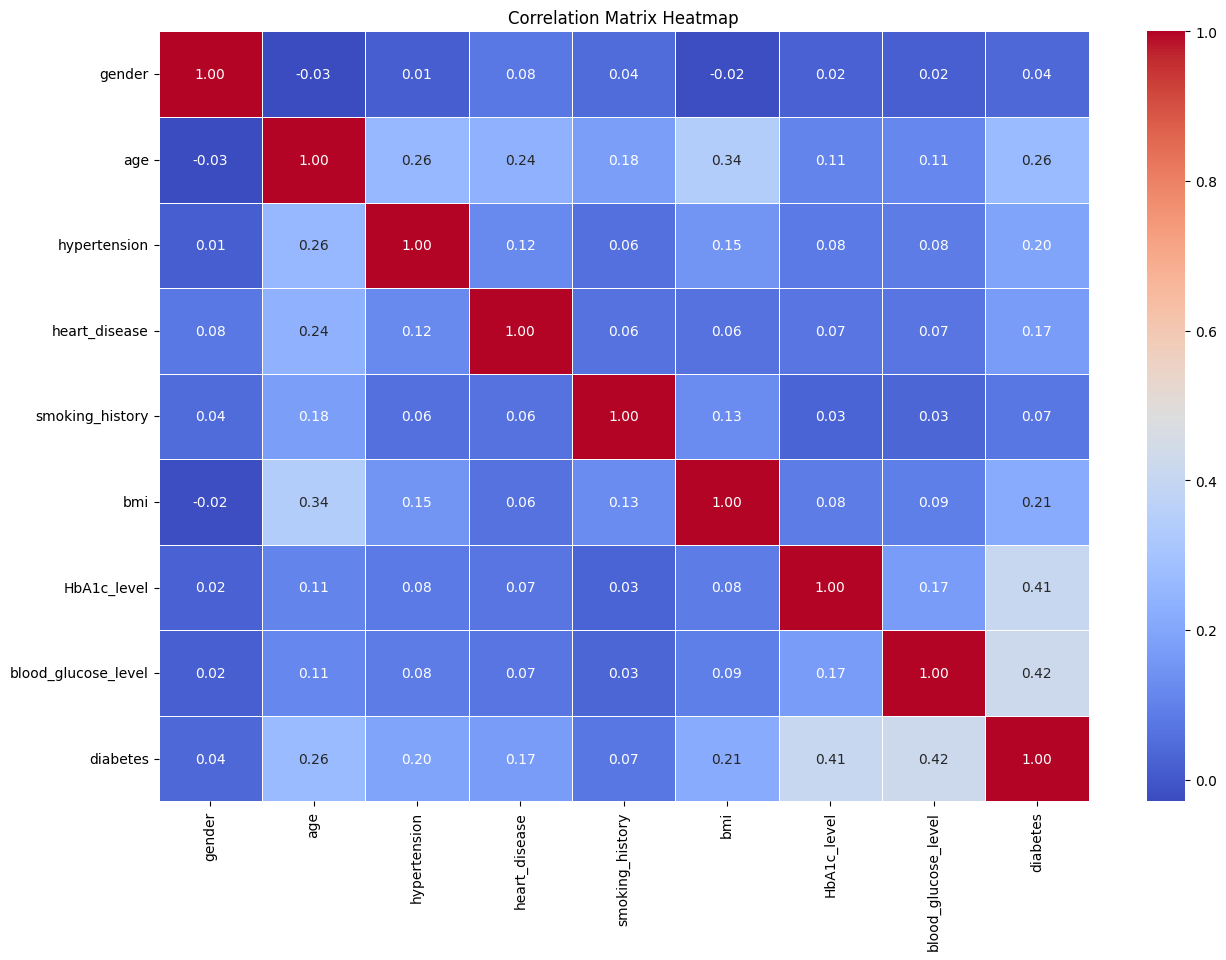

In [28]:
correlation_matrix = df1.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

Random Forest Accuracy: 0.9705148205928237

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       1.00      0.67      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



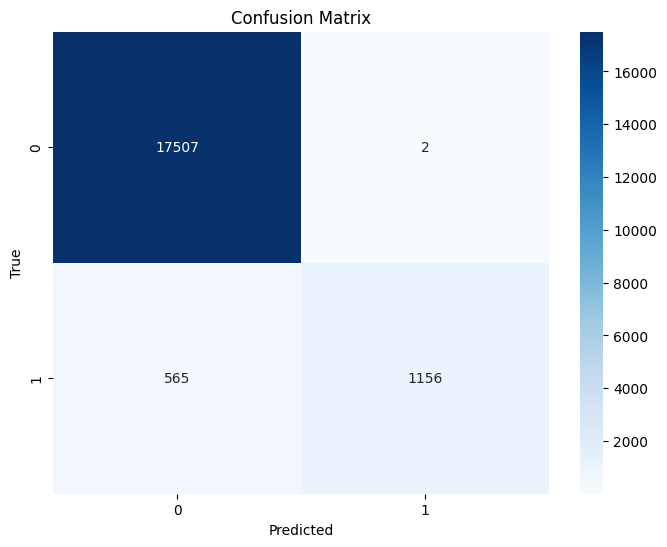

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into features and target variable
X = df1.drop('diabetes', axis=1)
y = df1['diabetes']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Random Forest Accuracy with SMOTE: 0.955746229849194

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     17509
           1       0.76      0.74      0.75      1721

    accuracy                           0.96     19230
   macro avg       0.87      0.86      0.86     19230
weighted avg       0.96      0.96      0.96     19230



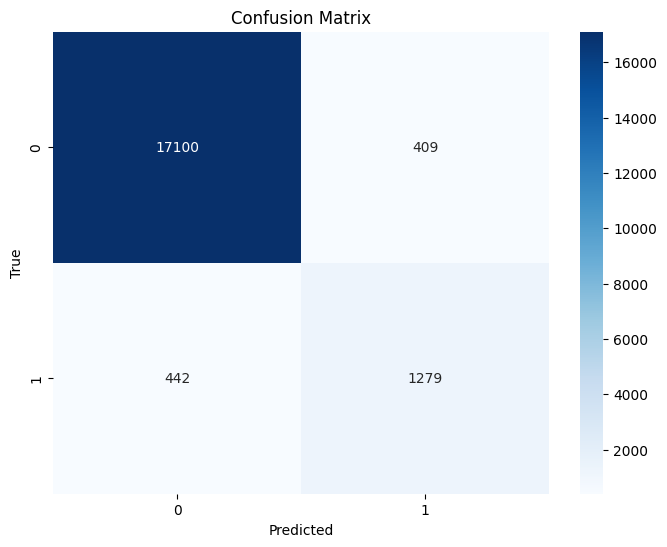

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into features and target variable
X = df1.drop('diabetes', axis=1) 
y = df1['diabetes']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model on the SMOTE-balanced data
rf_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy with SMOTE:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into features and target variable
X = df1.drop('diabetes', axis=1)  # Assuming 'diabetes' is the target column in your df1
y = df1['diabetes']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, silent=True, random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    


Training Random Forest...
Random Forest Accuracy: 0.955746229849194

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     17509
           1       0.76      0.74      0.75      1721

    accuracy                           0.96     19230
   macro avg       0.87      0.86      0.86     19230
weighted avg       0.96      0.96      0.96     19230


Training Logistic Regression...
Logistic Regression Accuracy: 0.8852834113364535

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93     17509
           1       0.43      0.89      0.58      1721

    accuracy                           0.89     19230
   macro avg       0.71      0.89      0.76     19230
weighted avg       0.94      0.89      0.90     19230


Training Gradient Boosting...
Gradient Boosting Accuracy: 0.9547581903276131

Classification Report fo

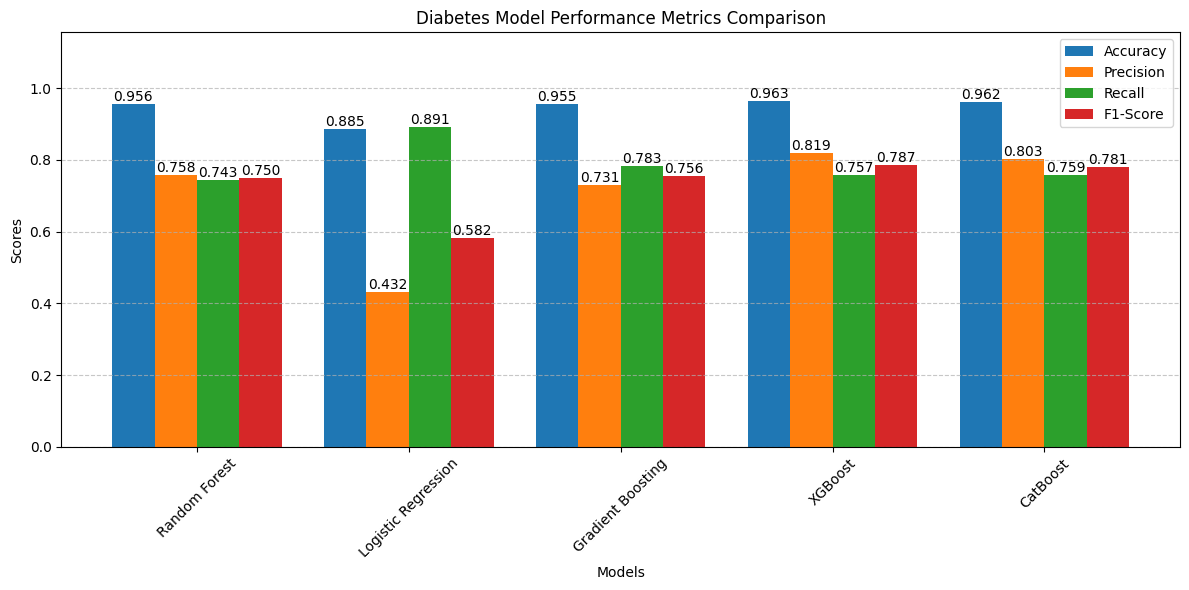


Detailed Model Performance Metrics:
                     Accuracy  Precision  Recall  F1-Score
Random Forest            0.96       0.76    0.74      0.75
Logistic Regression      0.89       0.43    0.89      0.58
Gradient Boosting        0.95       0.73    0.78      0.76
XGBoost                  0.96       0.82    0.76      0.79
CatBoost                 0.96       0.80    0.76      0.78


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_metrics = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    model_metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Convert to DataFrame for easier plotting
df_metrics = pd.DataFrame(model_metrics).T

# Create grouped bar plot
plt.figure(figsize=(12, 6))
bar_width = 0.2
x = np.arange(len(df_metrics.index))  # Define x here using the number of models

plt.bar(x - bar_width*1.5, df_metrics['Accuracy'], bar_width, label='Accuracy')
plt.bar(x - bar_width/2, df_metrics['Precision'], bar_width, label='Precision')
plt.bar(x + bar_width/2, df_metrics['Recall'], bar_width, label='Recall')
plt.bar(x + bar_width*1.5, df_metrics['F1-Score'], bar_width, label='F1-Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Diabetes Model Performance Metrics Comparison')
plt.xticks(x, df_metrics.index, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i in range(len(x)):
    for j, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-Score']):
        plt.text(x[i] + bar_width*(j-1.5), df_metrics.iloc[i][metric], 
                f'{df_metrics.iloc[i][metric]:.3f}', 
                ha='center', va='bottom')

plt.margins(y=0.2)
plt.tight_layout()
plt.show()

print("\nDetailed Model Performance Metrics:")
print(df_metrics.round(4))